# Model Evaluation 

## Set Up

In [89]:
import joblib
import pandas as pd
import pickle
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

### Load Model 

In [90]:

random_search = joblib.load("Data/vehicle_model.pkl")

### Load Test Train Split 

In [91]:


with open("Data/X_train.pkl", "rb") as f:
    X_train = pickle.load(f)

with open("Data/X_test.pkl", "rb") as f:
    X_test = pickle.load(f)

with open("Data/y_train.pkl", "rb") as f:
    y_train = pickle.load(f)

with open("Data/y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

print("Train/test sets loaded successfully.")

Train/test sets loaded successfully.


## Run Model 

In [92]:

y_pred_log = random_search.predict(X_test)



## Convert Log Price 

In [93]:

y_pred_price = np.expm1(y_pred_log)
y_test_price = np.expm1(y_test)   # actual prices
residuals_price = y_test_price - y_pred_price


## Evaluating Residuals 

In [94]:

rmse_price = mean_squared_error(y_test_price, y_pred_price, squared=False)
mae_price = mean_absolute_error(y_test_price, y_pred_price)
r2_price = r2_score(y_test_price, y_pred_price)

print(f"RMSE (£): {rmse_price:,.2f}")
print(f"MAE (£): {mae_price:,.2f}")
print(f"R²: {r2_price:.2f}")


RMSE (£): 1,325.28
MAE (£): 772.99
R²: 0.92


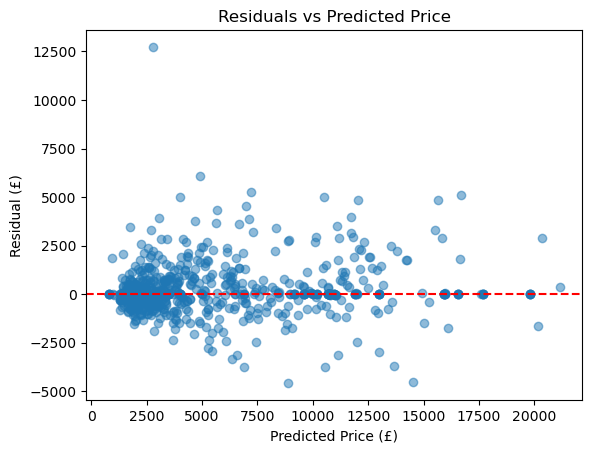

In [95]:


plt.scatter(y_pred_price, residuals_price, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price (£)')
plt.ylabel('Residual (£)')
plt.title('Residuals vs Predicted Price')
plt.show()


## Permutation Importance

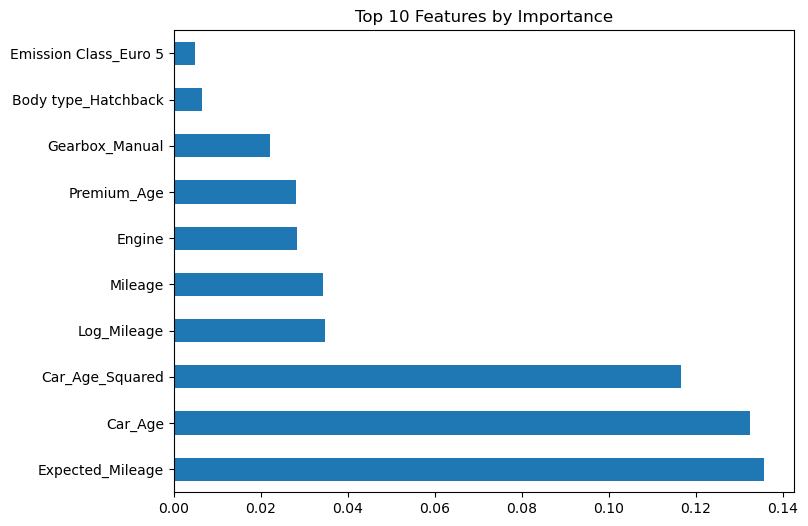

In [104]:


perm = permutation_importance(random_search, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1, scoring='r2')
perm_importance = pd.Series(perm.importances_mean, index=X_test.columns).sort_values(ascending=False)
perm_importance.head(10).plot(kind='barh', figsize=(8,6), title='Top 10 Features by Importance')
plt.show()
